In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('Train_UWu5bXk.csv',header=0)
test_data = pd.read_csv('Test_u94Q5KV.csv',header=0)

In [3]:
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
test_data['Item_Outlet_Sales'] = 0

In [7]:
df = pd.concat([train_data,test_data])

In [8]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [9]:
df.shape

(14204, 12)

In [10]:
df.isnull().sum(axis = 0)

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# Fat content

print(df.Item_Fat_Content.unique())

df.loc[df.Item_Fat_Content.isin(['LF','low fat']), 'Item_Fat_Content'] = 'Low Fat'
df.loc[df.Item_Fat_Content.isin(['reg']), 'Item_Fat_Content'] = 'Regular'

print(df.Item_Fat_Content.value_counts())

print(df.Item_Type.unique())

print(df.groupby('Item_Type')['Item_Fat_Content'].count())

df.loc[df.Item_Type.isin(['Health and Hygiene','Household','Others']), 'Item_Fat_Content'] = 'None'

print(df.Item_Fat_Content.value_counts())


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Item_Type
Baking Goods             1086
Breads                    416
Breakfast                 186
Canned                   1084
Dairy                    1136
Frozen Foods             1426
Fruits and Vegetables    2013
Hard Drinks               362
Health and Hygiene        858
Household                1548
Meat                      736
Others                    280
Seafood                    89
Snack Foods              1989
Soft Drinks               726
Starchy Foods             269
Name: Item_Fat_Content, dtype: int64
Low Fat    6499
Regular    5019
None       2686
Name: Item_Fat_Content, dtype: int64


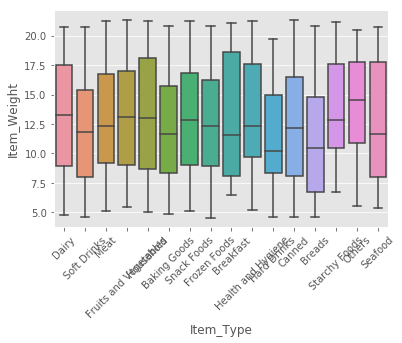

In [12]:
sns.boxplot(df.Item_Type, df.Item_Weight)
plt.xticks(rotation=45)
plt.show()

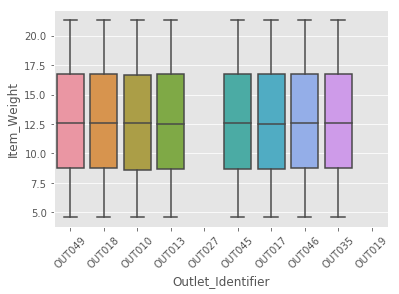

In [13]:
sns.boxplot(df.Outlet_Identifier, df.Item_Weight)
plt.xticks(rotation=45)
plt.show()

In [14]:
## Out027 and Out019 dont have any identifier associated with them

## Fill missing values in item weight with particular item identifier mean

weights_mean = df.groupby('Item_Identifier',as_index=False).mean()

print(weights_mean.head(5))

  Item_Identifier  Item_Weight  Item_Visibility    Item_MRP  \
0           DRA12       11.600         0.034938  141.682067   
1           DRA24       19.350         0.045646  164.016800   
2           DRA59        8.270         0.133384  184.982400   
3           DRB01        7.390         0.079736  189.890500   
4           DRB13        6.115         0.006799  189.797444   

   Outlet_Establishment_Year  Item_Outlet_Sales  
0                1998.666667        1229.066800  
1                1997.300000        1572.353280  
2                1997.300000        2091.544120  
3                1996.625000         569.259000  
4                1998.666667        1349.354667  


In [15]:
df['Item_Weight'] = df.apply(
    lambda row: weights_mean.loc[weights_mean['Item_Identifier']==row['Item_Identifier'],'Item_Weight'] if np.isnan(row['Item_Weight']) else row['Item_Weight'],
    axis=1
)

In [16]:
df.isnull().sum(axis = 0)
df.Item_Weight = df.Item_Weight.astype(float)

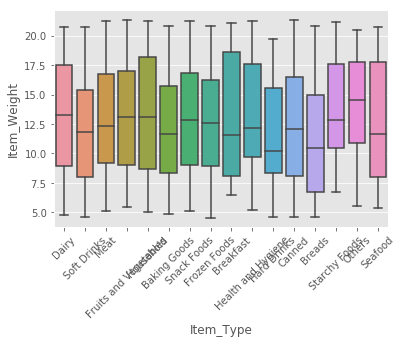

In [17]:
sns.boxplot(df.Item_Type, df.Item_Weight)
plt.xticks(rotation=45)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            14204 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.7+ MB


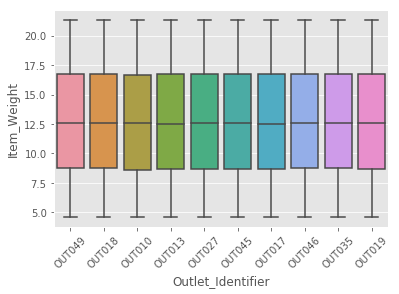

In [19]:
sns.boxplot(df.Outlet_Identifier, df.Item_Weight)
plt.xticks(rotation=45)
plt.show()

In [20]:
df['year'] = 2013 - df.Outlet_Establishment_Year
df = df.drop(['Outlet_Establishment_Year'],axis=1)


In [21]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'year'],
      dtype='object')

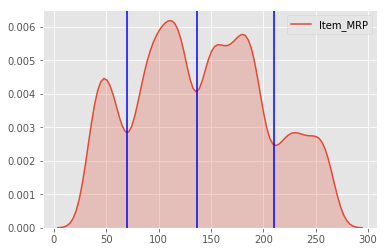

In [22]:
sns.kdeplot(df.Item_MRP,shade=True)
plt.axvline(x=70,color="blue")
plt.axvline(x=137,color="blue")
plt.axvline(x=210,color="blue")

In [23]:
### There are four different range of prices. Lets introduce a variable MRP level to account for that.
conditions = [
    (df['Item_MRP'] < 70),
    (df['Item_MRP'] < 137),
    (df['Item_MRP'] < 210),
    (df['Item_MRP'] >210)]
choices = ['Low', 'Medium', 'High','Very high']

df['MRP_level'] = np.select(conditions, choices)

In [24]:
df.MRP_level.head(10)

0    Very high
1          Low
2         High
3         High
4          Low
5          Low
6          Low
7       Medium
8       Medium
9         High
Name: MRP_level, dtype: object

In [25]:
### Missing values in outlet_size

df.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [26]:
### Outlet 10 & 19 have reported far less data than other supermarkets.
### Let's assume its because they are smaller and have lesser goods to offer.

df.groupby('Outlet_Identifier').agg({'Item_Identifier' : len})

,Item_Identifier
Outlet_Identifier,
OUT010,925
OUT013,1553
OUT017,1543
OUT018,1546
OUT019,880
OUT027,1559
OUT035,1550
OUT045,1548
OUT046,1550


In [27]:
### From the above table it is clear that outlet 10 & 19 are smaller and hence have lesser 
### number of items as indicated by the length of item identifiers.

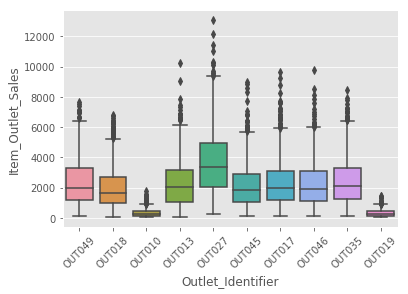

In [28]:
### Boxplot of Sales vs Outlet Identifier
sns.boxplot(train_data.Outlet_Identifier,train_data.Item_Outlet_Sales)
plt.xticks(rotation=45)
plt.show()

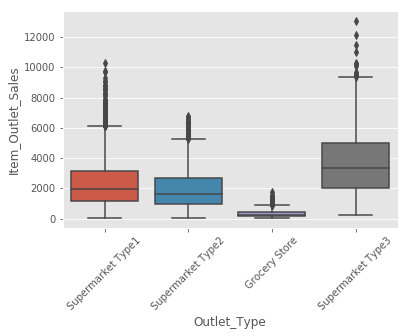

In [29]:
### Boxplot of Sales vs Outlet Type
sns.boxplot(train_data.Outlet_Type,train_data.Item_Outlet_Sales)
plt.xticks(rotation=45)
plt.show()

In [30]:
# Sales in the one type 2 supermarket appear a bit low.
# Maybe it's because it's still fairly new, having
# been founded 4 years ago.

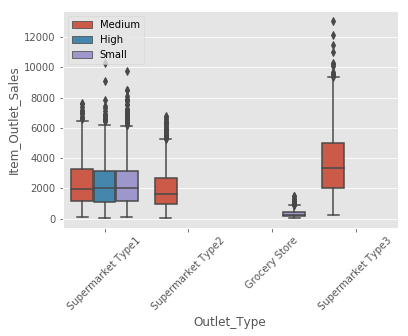

In [31]:
### Boxplot of Sales vs Outlet Type
ax = sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train_data,hue="Outlet_Size")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.legend(loc='upper left')
plt.show()

In [32]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'year',
       'MRP_level'],
      dtype='object')

In [33]:
othershops = df.groupby(['Outlet_Identifier','Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']).agg({'Outlet_Size' : len})
othershops = othershops.add_suffix('_Count').reset_index()

In [34]:
### Out10 is small
df['Outlet_Size'] = np.where(df['Outlet_Identifier'] == 'OUT010', 'SMALL', df['Outlet_Size'])

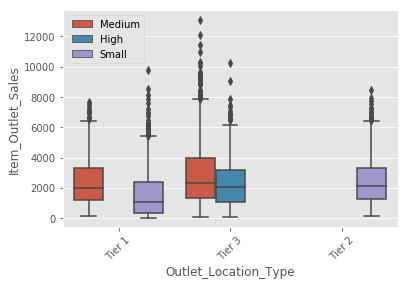

In [35]:
### Boxplot of Sales vs Outlet Location Type
ax = sns.boxplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=train_data,hue="Outlet_Size")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.legend(loc='upper left')
plt.show()

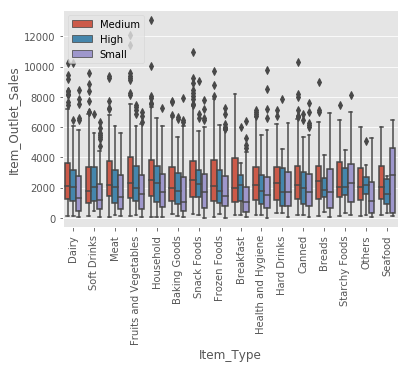

In [36]:
### Boxplot of Sales vs Item Type
ax = sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=train_data,hue="Outlet_Size")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.legend(loc='upper left')
plt.show()

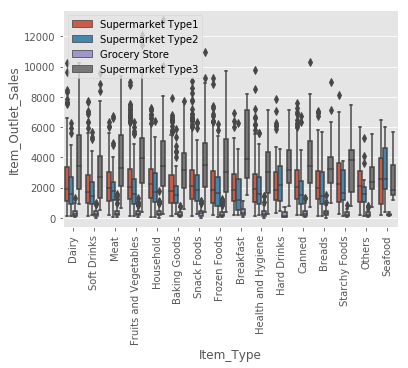

In [37]:
### Boxplot of Sales vs Item Type
ax = sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=train_data,hue="Outlet_Type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.legend(loc='upper left')
plt.show()

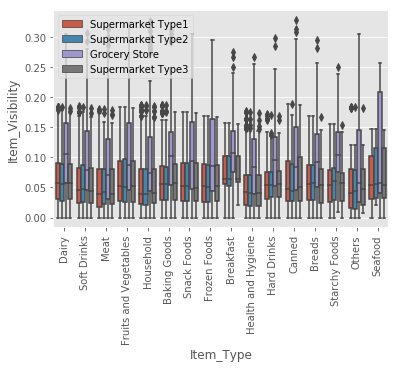

In [38]:
### Boxplot of Sales vs Item Type
ax = sns.boxplot(x="Item_Type", y="Item_Visibility", data=df,hue="Outlet_Type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.legend(loc='upper left')
plt.show()

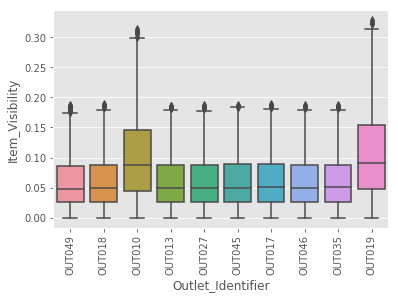

In [39]:
### Boxplot of Sales vs Item Type
ax = sns.boxplot(x="Outlet_Identifier", y="Item_Visibility", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [40]:
# let's have a look at the item identifiers now,
# there are way too many of them.
#
# keeping only the first two letters gives us three groups:
# food, drink and non-food

df['Item_class'] = df['Item_Identifier'].str[0:2]

In [41]:
df['Item_class'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_class, dtype: int64

In [42]:
### Keeping the first three letters gives a higher granularity
df['Item_Identifier'] = df['Item_Identifier'].str[0:2]

In [43]:
df['Item_Identifier'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

In [44]:
newdf = df.select_dtypes(exclude=['object'])

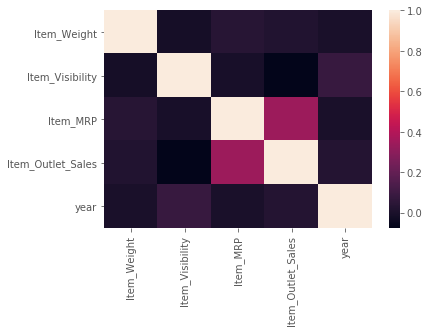

In [45]:
corr = newdf.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

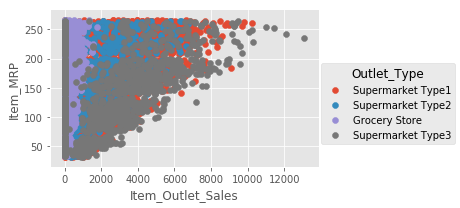

In [46]:
# Scatter plot of Item_Outlet_Sales vs Item_MRP

fg = sns.FacetGrid(data=df, hue='Outlet_Type', aspect=1.61)
fg.map(plt.scatter, 'Item_Outlet_Sales', 'Item_MRP').add_legend()

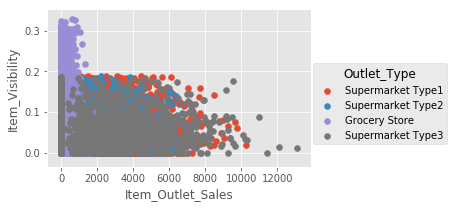

In [47]:
# Scatter plot of Item_Outlet_Sales vs Item_Visibility
fg = sns.FacetGrid(data=df, hue='Outlet_Type', aspect=1.61)
fg.map(plt.scatter, 'Item_Outlet_Sales', 'Item_Visibility').add_legend()

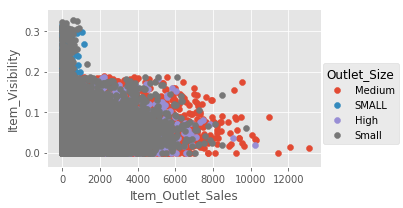

In [48]:
# Scatter plot of Item_Outlet_Sales vs Item_Visibility

fg = sns.FacetGrid(data=df, hue='Outlet_Size', aspect=1.61)
fg.map(plt.scatter, 'Item_Outlet_Sales', 'Item_Visibility').add_legend()

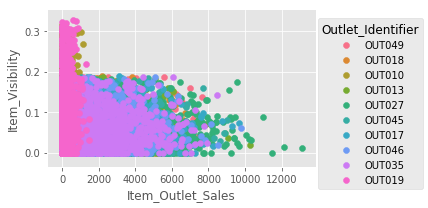

In [49]:
# Scatter plot of Item_Outlet_Sales vs Item_Visibility

fg = sns.FacetGrid(data=df, hue='Outlet_Identifier', aspect=1.61)
fg.map(plt.scatter, 'Item_Outlet_Sales', 'Item_Visibility').add_legend()

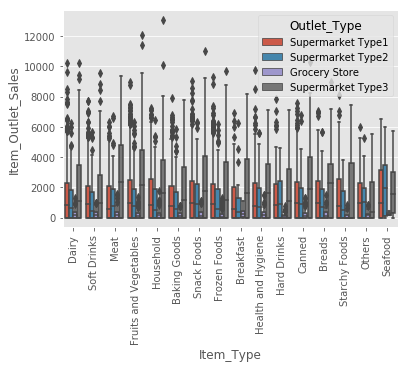

In [50]:
### Boxplot of Sales vs Item Type
ax = sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=df,hue="Outlet_Type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

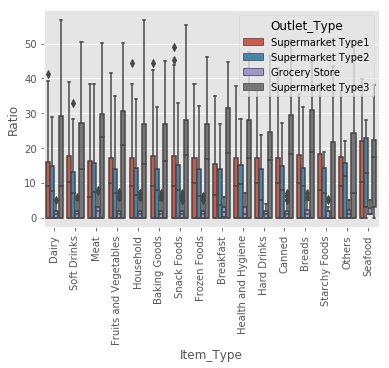

In [51]:
### Plenty of Outliers here. We can reduce this by dividing Item_Outlet_Sales by Item_MRP
### Boxplot of Sales vs Item Type
df['Ratio'] = df['Item_Outlet_Sales']/df['Item_MRP']

ax = sns.boxplot(x="Item_Type", y="Ratio", data=df,hue="Outlet_Type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


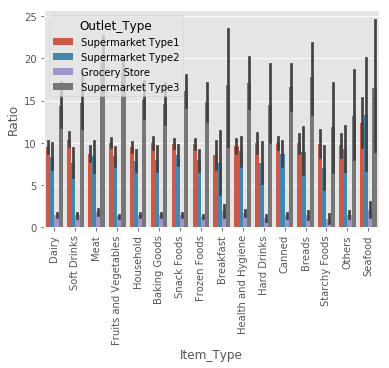

In [52]:
ax = sns.barplot(x="Item_Type", y="Ratio", data=df,hue="Outlet_Type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [53]:
# dividing sales by MRP does reduce the number of outliers
# and also emphasizes the differences between the different
# types of shop

df['Item_Outlet_Sales'] = df['Ratio']
df = df.drop(['Ratio'],axis=1)

In [54]:
# Lets see the ratio of supermarkets to grocery types
df.Outlet_Type.value_counts()

# Although the ratio is too big, a random forest or gbm should be able to deal with this given enough trees.

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [55]:
# Time to look at the data for each shop separately

def analyze_shop(shop_id):
    shopdata = df[df['Outlet_Identifier'].str.contains(shop_id)]
    # as Size, location type and type have only one level, we can drop them here
    # since the variance of Outlet_Establishment_Year is zero, we
    # can also remove that column
    shopdata = shopdata.drop(['Outlet_Identifier',
                   'Outlet_Size', 
                   'Outlet_Location_Type', 
                   'Outlet_Type', 
                   'year'], axis=1)
    plt.figure(1)
    plt.subplot(221)
    sns.distplot(shopdata.Item_Weight)
    plt.subplot(222)
    sns.distplot(shopdata.Item_Visibility)
    plt.subplot(223)
    sns.distplot(shopdata.Item_MRP)
    plt.subplot(224)
    sns.distplot(shopdata.Item_Outlet_Sales)
    plt.figure(2)
    ax = sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=shopdata)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()
    

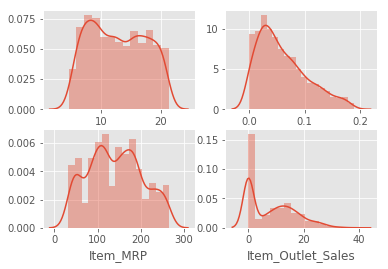

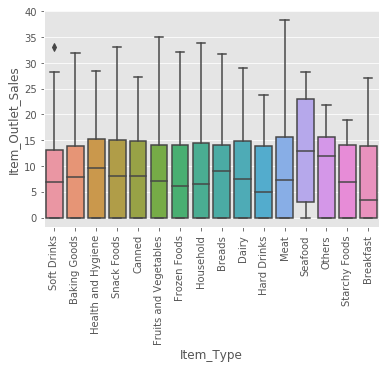

In [56]:
analyze_shop('OUT018')

In [57]:
# one hot encoding
cols = df.select_dtypes(include=["object"]).columns
df2 = pd.get_dummies(df, columns=cols, drop_first=True)

In [58]:
# let's resurrect the train and test data sets
new_train = df2[1:train_data.shape[0]]
new_test = df2[-test_data.shape[0]:]

In [59]:
print(new_test.shape)
print(new_train.shape)

(5681, 46)
(8522, 46)


In [60]:
target = new_train.Item_Outlet_Sales
new_train= new_train.drop('Item_Outlet_Sales',axis=1)

In [61]:
new_test = new_test.drop('Item_Outlet_Sales',axis=1)

In [62]:
new_train.to_csv('new_train.csv', sep=',', encoding='utf-8')
new_test.to_csv('new_test.csv', sep=',', encoding='utf-8')

In [63]:
# Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_train_scaled = pd.DataFrame(scaler.fit_transform(new_train), columns=new_train.columns)
new_test_scaled = pd.DataFrame(scaler.transform(new_test), columns=new_test.columns)

In [64]:
# ensembling of different models

from sklearn.model_selection import cross_val_score
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

ridge = Ridge(random_state=1)
gbreg = GradientBoostingRegressor(**params)
bayridge=BayesianRidge()
xgb = XGBRegressor()
streg = StackingRegressor(regressors=[ridge,gbreg,bayridge], 
                           meta_regressor=xgb)
for clf, label in zip([ridge,gbreg,xgb,bayridge,streg], ['Ridge','GBR','XGB','Bayesian Ridge','Ensemble']):
    scores = cross_val_score(clf, new_train,target, cv=10, scoring='neg_mean_squared_error')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: -48.64 (+/- 3.24) [Ridge]
Accuracy: -49.04 (+/- 3.42) [GBR]
Accuracy: -49.10 (+/- 3.37) [XGB]
Accuracy: -48.63 (+/- 3.24) [Bayesian Ridge]
Accuracy: -53.46 (+/- 3.80) [Ensemble]


In [65]:
ridge.fit(new_train,target)
prediction1 = ridge.predict(new_test)

In [66]:
gbreg.fit(new_train,target)
prediction2 = gbreg.predict(new_test)

In [67]:
xgb.fit(new_train,target)
prediction3 = xgb.predict(new_test)

In [68]:
bayridge.fit(new_train,target)
prediction4 = bayridge.predict(new_test)

In [69]:
streg.fit(new_train,target)
prediction5 = streg.predict(new_test)

In [70]:
prediction = (0.3*prediction1+0.3*prediction4+0.25*prediction2+0.15*prediction3)*new_test.Item_MRP

In [71]:
results = test_data[['Item_Identifier','Outlet_Identifier']]

In [72]:
results.is_copy = False
results.loc[:,'Item_Outlet_Sales'] = prediction

In [73]:
#results.to_csv('submission.csv', sep=',', encoding='utf-8', index=False)